# Importing the libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, utils
from tensorflow import keras
from matplotlib import pyplot as plt

import sys
sys.path.insert(0, '../../')
from plot_graphs import plot_loss, plot_acc

# Setting Image and Batch Size

In [2]:
IMAGE_SIZE = 100
BATCH_SIZE = 32

# Loading the train, val, and test data

In [3]:
train = utils.image_dataset_from_directory("../../datasets/data/split/Zenodo/train", image_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE)
val = utils.image_dataset_from_directory("../../datasets/data/split/Zenodo/val", image_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE)
test = utils.image_dataset_from_directory("../../datasets/data/split/Zenodo/test", image_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE)

Found 3360 files belonging to 6 classes.
Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Found 720 files belonging to 6 classes.
Found 720 files belonging to 6 classes.


2022-08-07 15:03:49.055241: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-07 15:03:49.055370: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


# Defining the model

In [4]:
inputs = keras.Input(shape=(100, 100, 3))
x = inputs
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(16, 5, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(16, 5, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.MaxPooling2D(2)(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)

x = layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.008), activation='relu')(x)

x = layers.Dropout(0.3)(x)

outputs = layers.Dense(6, activation='softmax')(x)

model = keras.Model(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 100, 100, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 96, 96, 16)        1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 16)        6416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 16)       0         
 2D)                                                         

# Adding Callbacks

In [5]:
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath="../../models/zenodo/m5_replication_1.h5",
        monitor="val_accuracy",
        save_best_only=True
    )
]

# Running the model

In [6]:
history = model.fit(
  train.cache(),
  epochs=40,
  callbacks=callbacks_list,
  validation_data=val.cache()
)

Epoch 1/40


2022-08-07 15:03:49.855462: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-07 15:03:49.855536: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


103/105 [============================>.] - ETA: 0s - loss: 1.8518 - accuracy: 0.2081

2022-08-07 15:03:53.869800: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


105/105 [==============================] - 5s 29ms/step - loss: 1.8487 - accuracy: 0.2104 - val_loss: 1.6901 - val_accuracy: 0.2861
Epoch 2/40
105/105 [==============================] - 2s 23ms/step - loss: 1.4967 - accuracy: 0.3810 - val_loss: 1.0961 - val_accuracy: 0.6306
Epoch 3/40
105/105 [==============================] - 2s 24ms/step - loss: 1.1305 - accuracy: 0.5634 - val_loss: 0.8260 - val_accuracy: 0.6861
Epoch 4/40
105/105 [==============================] - 2s 23ms/step - loss: 0.9722 - accuracy: 0.6307 - val_loss: 0.6833 - val_accuracy: 0.7694
Epoch 5/40
105/105 [==============================] - 2s 24ms/step - loss: 0.8625 - accuracy: 0.6798 - val_loss: 0.6180 - val_accuracy: 0.7806
Epoch 6/40
105/105 [==============================] - 2s 23ms/step - loss: 0.7557 - accuracy: 0.7271 - val_loss: 0.5411 - val_accuracy: 0.8028
Epoch 7/40
105/105 [==============================] - 2s 23ms/step - loss: 0.6848 - accuracy: 0.7592 - val_loss: 0.5244 - val_accuracy: 0.8083
Epoch 8/40

# Evaluating the model

In [7]:
# model.evaluate(test)

load_model = keras.models.load_model("../../models/zenodo/m5_replication_1.h5")
load_model.evaluate(test)

 8/23 [=========>....................] - ETA: 0s - loss: 0.5495 - accuracy: 0.8555

2022-08-07 15:05:30.695372: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 0s 14ms/step - loss: 0.5123 - accuracy: 0.8639


[0.5122581124305725, 0.8638889193534851]

<module 'matplotlib.pyplot' from '/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/matplotlib/pyplot.py'>

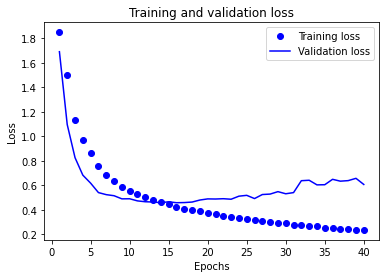

In [8]:
# Plotting loss and accuracy graphs
## Plotting loss
plot_loss(history)


<module 'matplotlib.pyplot' from '/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/matplotlib/pyplot.py'>

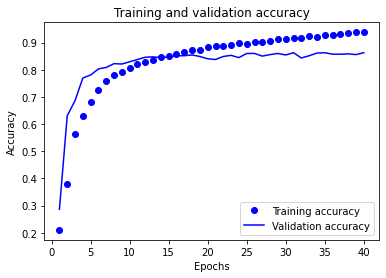

In [9]:
## Plotting accuracy
plot_acc(history)